In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [116]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [149]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [151]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [109]:
tsla = yf.Ticker('TSLA')

In [110]:
tesla_data = tsla.history(period ='max')

In [111]:
tesla_data.reset_index(inplace=True)

In [112]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [119]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [120]:
html_data = requests.get(url).text

In [121]:
soup = BeautifulSoup(html_data,'html.parser')

In [122]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [123]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    

    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [124]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [125]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [126]:
tesla_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [127]:
gme = yf.Ticker('GME')

In [128]:
gme_data = gme.history(period ='max')

In [129]:
gme_data.reset_index(inplace=True)

In [141]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [130]:
url_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [131]:
html_data_2 = requests.get(url_2).text

In [132]:
soup = BeautifulSoup(html_data_2,'html.parser')

In [133]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [134]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    

    gme_revenue = pd.concat([gme_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [135]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [136]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [137]:
gme_revenue.tail(5)

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


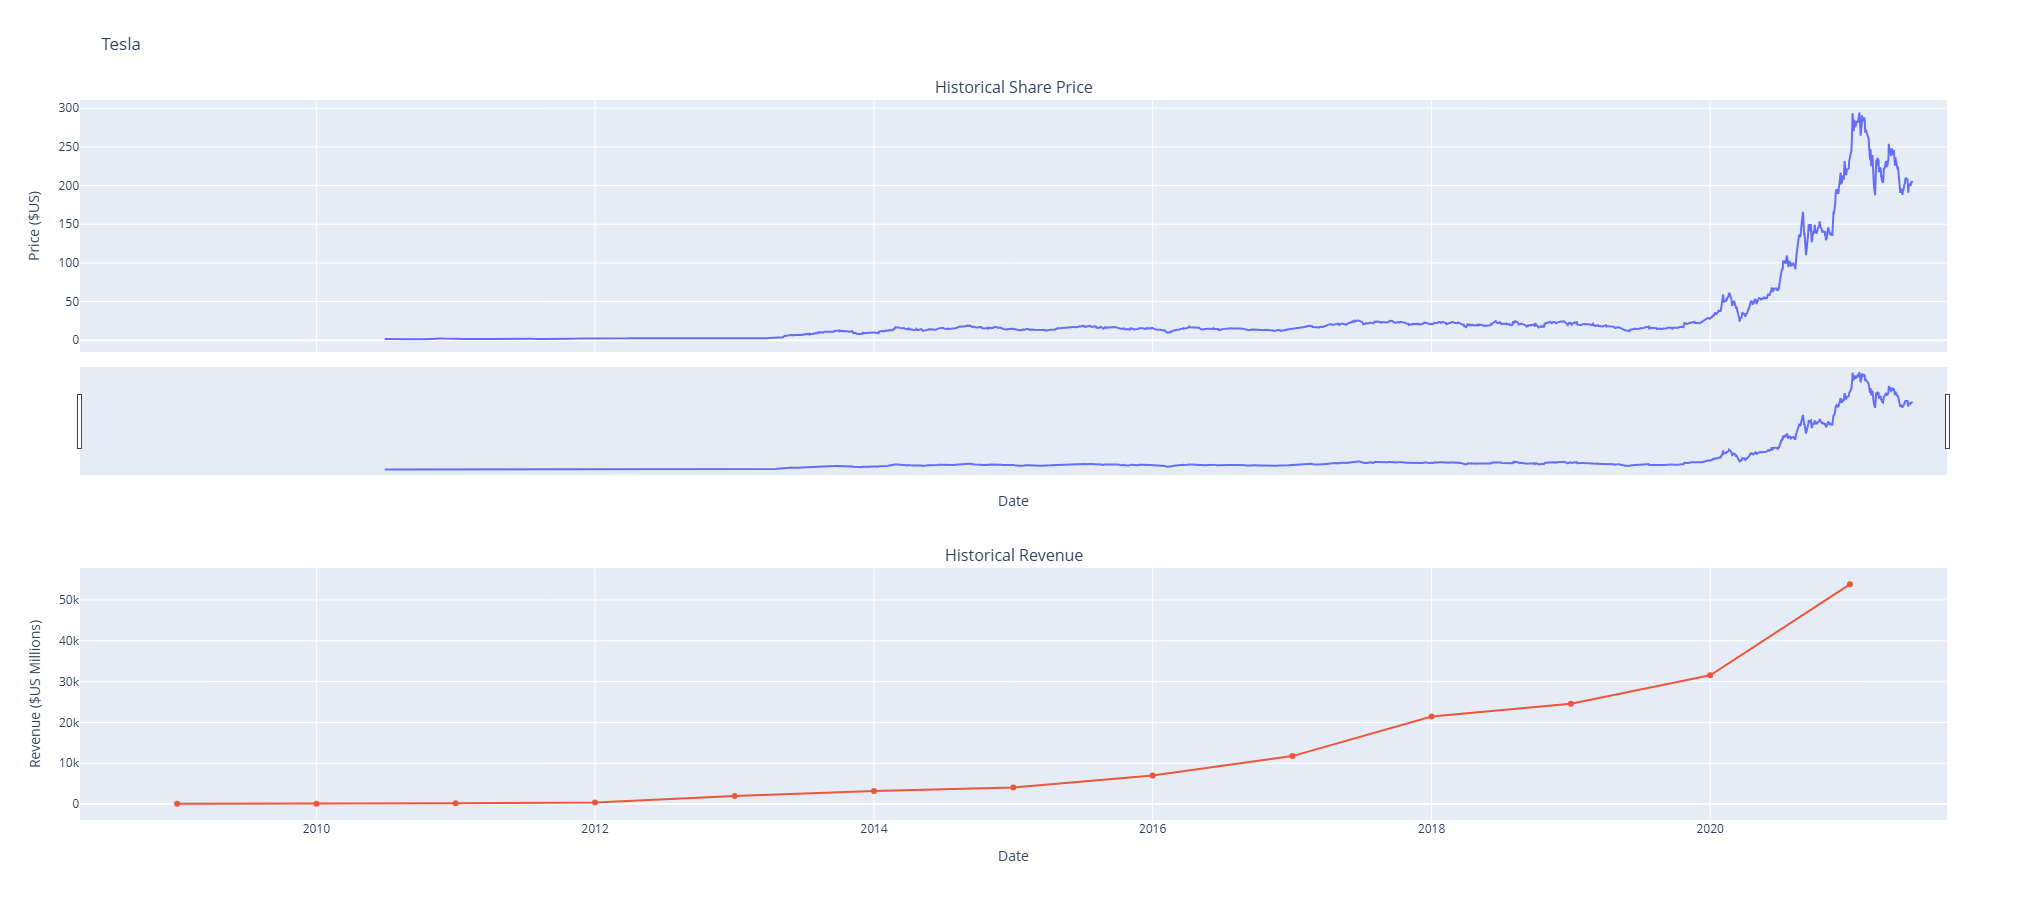

In [152]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

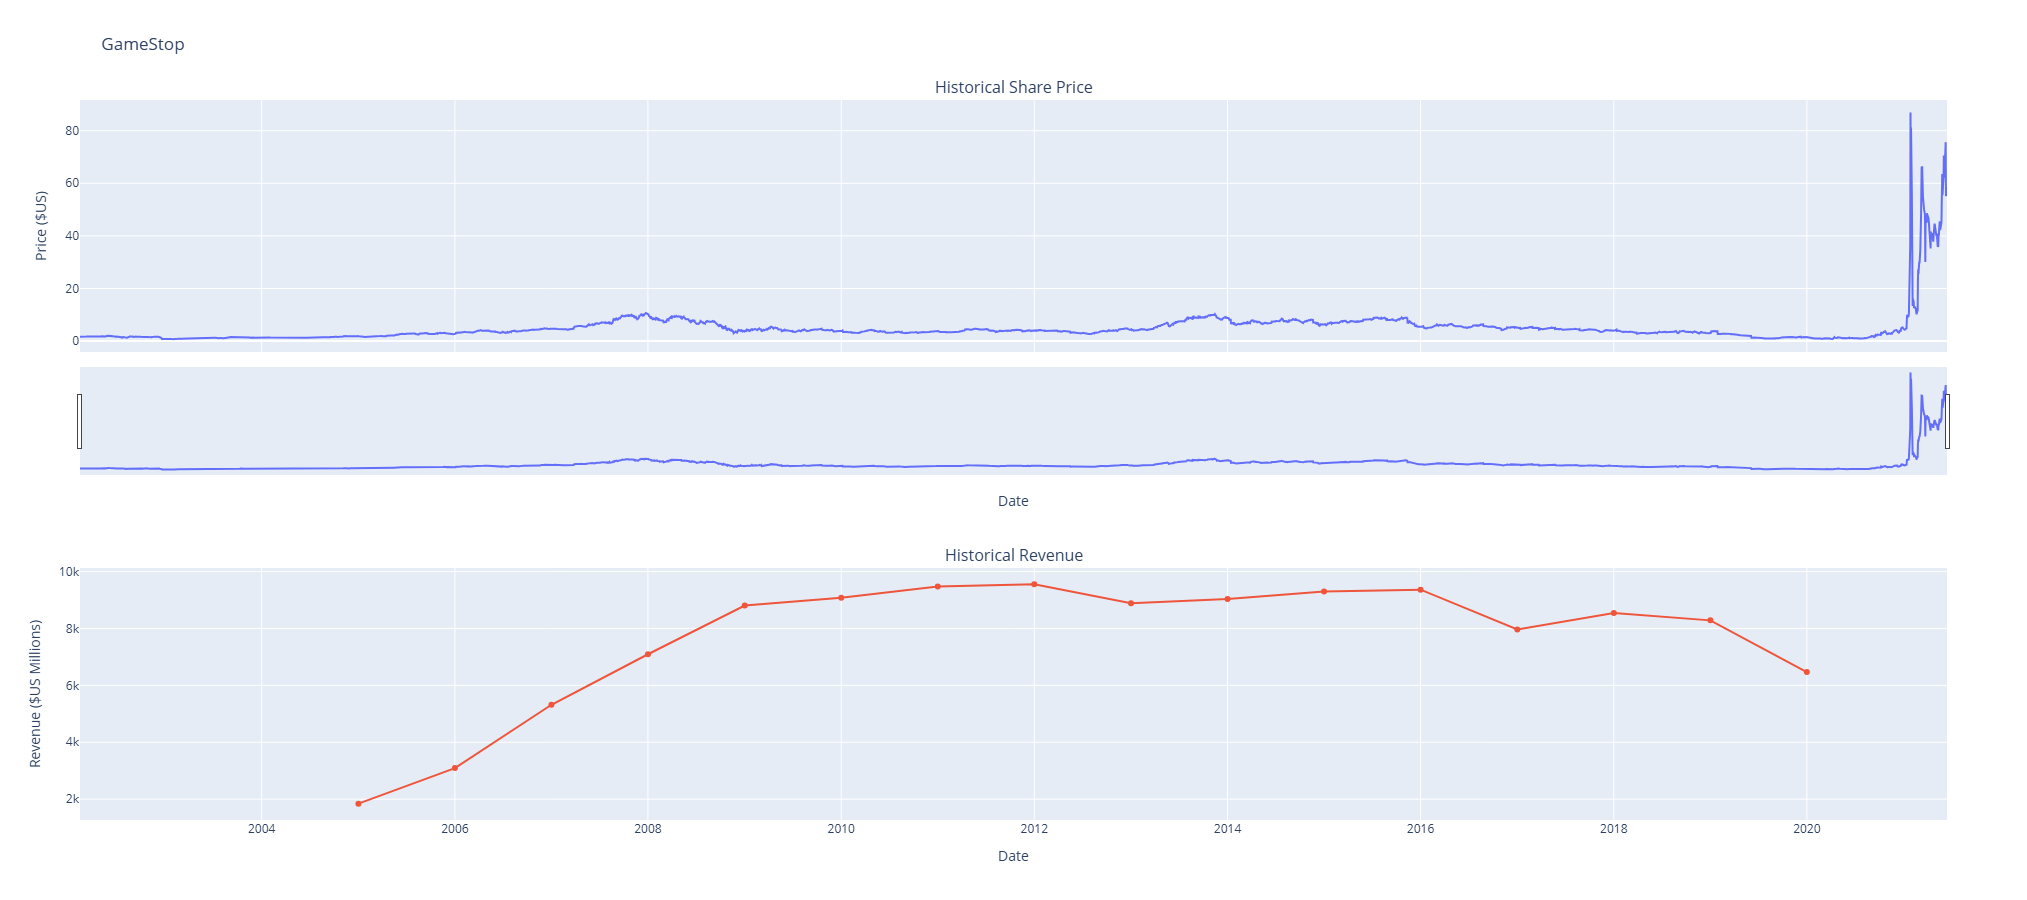

In [153]:
make_graph(gme_data, gme_revenue, 'GameStop')